# REGRESIÓN LINEAL

## Modelo: KEYNESIANO

## Paso 1: Analizar asociación entre variables.

1.1. Se realiza un diagrama de dispersión.

In [3]:
x = [20,40,20,30,10,10,20,20,20,30]
y = [30,60,40,60,30,40,40,50,30,70]

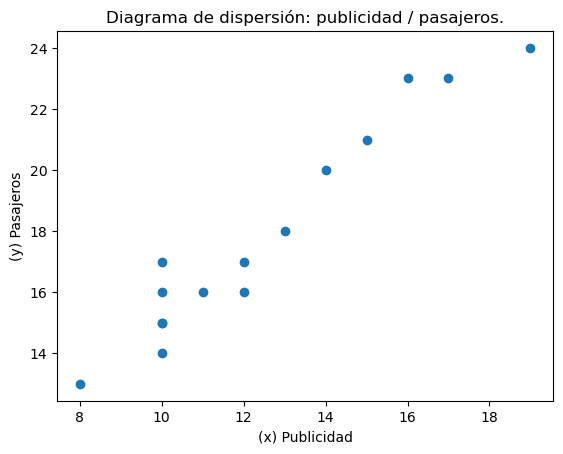

In [4]:
import numpy as np
import matplotlib.pyplot as plt

###---DATOS---###
#ejemplo 11.4 pág. 344 Estadistica aplicada - WEBSTER

x = np.array([10,12,8,17,10,15,10,14,19,10,11,13,16,10,12])
y = np.array([15,17,13,23,16,21,14,20,24,17,16,18,23,15,16])
eje_x = input('Ingrese el nombre de la variable x: ')
eje_y = input('Ingrese el nombre de la variable y: ')

###---DIAGRAMA DE DISPERSIÓN---###

plt.title('Diagrama de dispersión: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.scatter(x, y) #gráfico de dispersión
plt.show() #for clean output

1.2. Se calcula e interpretan algunos coeficientes como: error estándar de estimación (Se), error estándar de regresión (Sb), correlación bivariada (r), determinación bivariada (R2), para evaluar la capacidad predictiva de el modelo estudiado.

In [10]:
#mean_x = media de x
#mean_y = media de y
#std_x = desviación std. de x
#std_y = desviación std. de y
#SCx = suma de cuadrados de x
#SCy = suma de cuadrados de y
#SCxy = suma de los productos cruzados x, y
#SCE = suma de cuadrados del error
#CME = cuadrado medio del error
#Se = error estandar de estimación
#Sb = error estandar de regresión
#int_conf = intervalos de confianza
#int_pre = intervalos de predicción

mean_x, mean_y = np.mean(x), np.mean(y)
std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1)
SCx = sum(x ** 2) - ((sum(x) ** 2) / len(x))
SCy = sum(y ** 2) - ((sum(y) ** 2) / len(y))
SCxy = sum(x*y) - (sum(x) * sum(y)) / len(x)

#m
pendiente = SCxy / SCx

#b
interseccion = mean_y - (pendiente * mean_x)

###---CALCULO DE (r)---###
r = SCxy / np.sqrt(SCx * SCy)
print('\nr = {:.3f}'.format(r))
###---INTERPRETACIÓN DE (r)---###
if r > 0:
    if r > 0.5:
        print('Existe una correlación positiva fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación positiva débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
elif r < 0:
    if r < -0.5:
        print('Existe una correlación negativa fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación negativa débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
else:
    print('No existe ninguna correlación entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))

###---CALCULO DE (R2)---###
R2 = (SCxy ** 2) / (SCx * SCy)
print('\nR2 = {:.3f}'.format(R2))
###---INTERPRETACION DE (R2)---###
print('El {:.0f}% del cambio en los valores de {} se explica mediante un cambio en los valores de {}.'.format((R2*100), eje_y.lower(), eje_x.lower()))

###---CALCULO DE (t)---###
t = (r * np.sqrt(len(x) - 2)) / (np.sqrt(1 - (r ** 2)))
print('\nt = {:.3f}'.format(t))
###---INTERPRETACION DE (t)---###
#¿Cómo sacar el intervalo para la prueba t student?
#Se halla buscando en la tabla t-student la interseccion entre la columna alfa = 0.05 o alfa/2 = 0.025 y la fila 13 = valor de t
#el intervalo es 2,160
t_student = 2.160
intervalo_decision = np.arange(-t_student, t_student, 0.001)
if t not in intervalo_decision:
    print('A un nivel de 5% de significancia, parece existir una relación entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
else:
    print('A un nivel de 5% de significancia, no parece existir una relación entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))

###---CALCULO DEL ERROR ESTÁNDAR DE ESTIMACIÓN (Se) cuando alfa=0.05
SCE = SCy - (((SCxy) ** 2) / SCx)
CME = SCE / (len(x) - 2)
Se = np.sqrt(CME)
print('\nSe = {:.3f}'.format(Se))
###---INTERPRETACIÓN DEL ERROR ESTÁNDAR DE ESTIMACIÓN (Se) Se1=68.3% Se2=95.5% Se3=99.7%
print('El 68.3% de las veces que se invierta x valor en publicidad, se espera que el número de pasajeros esté entre: x + {:.2f} y x - {:.2f}'.format(Se, Se))

###---CALCULO DEL ERROR ESTÁNDAR DE REGRESIÓN (Sb)
Sb = Se / np.sqrt(SCx)
print('\nSb = {:.3f}'.format(Sb))
###---INTERPRETACIÓN DEL ERROR ESTÁNDAR DE REGRESIÓN (Sb) cuando alfa=0.05
intervalo_confianza_0 = pendiente - (t_student * Sb)
intervalo_confianza_1 = pendiente + (t_student * Sb)
print('A un nivel de 95% de confianza se puede estar seguro de que por cada incremento en el valor de {}, el valor de {} se incrementa entre {:.2f} y {:.2f}.'.format(eje_x.lower(), eje_y.lower(), intervalo_confianza_0, intervalo_confianza_1))


r = 0.968
Existe una correlación positiva fuerte entre publicidad y pasajeros.

R2 = 0.938
El 94% del cambio en los valores de pasajeros se explica mediante un cambio en los valores de publicidad.

t = 13.995
A un nivel de 5% de significancia, parece existir una relación entre publicidad y pasajeros.

Se = 0.907
El 68.3% de las veces que se invierta x valor en publicidad, se espera que el número de pasajeros esté entre: x + 0.91 y x - 0.91

Sb = 0.077
A un nivel de 95% de confianza se puede estar seguro de que por cada incremento en el valor de publicidad, el valor de pasajeros se incrementa entre 0.91 y 1.25.


## Paso 2: Validez del modelo.

In [ ]:
#intervalos de confianza e intervalos de prediccion

## Paso 3: Hallar la ecuación y la recta de mejor ajuste.

3.1. Mínimos cuadrados ordinarios: la recta de mejor ajuste

In [6]:
###---LA RECTA DE MEJOR AJUSTE---###

#m
pendiente = SCxy / SCx

#b
interseccion = mean_y - (pendiente * mean_x)

print('La pendiente de la recta de regresión es: {:.2f}.'.format(pendiente))

print('La interseccion de la recta con el eje y ocurre en el punto: (0, {:.2f})'.format(interseccion))

#ecuación de la recta
print('La ecuación de la recta es Y = {:.2f} + {:.2f}X'.format(interseccion, pendiente))

La pendiente de la recta de regresión es: 1.08.
La interseccion de la recta con el eje y ocurre en el punto: (0, 4.39)
La ecuación de la recta es Y = 4.39 + 1.08X


## Paso 4: Gráfica de la recta de la regresión lineal.

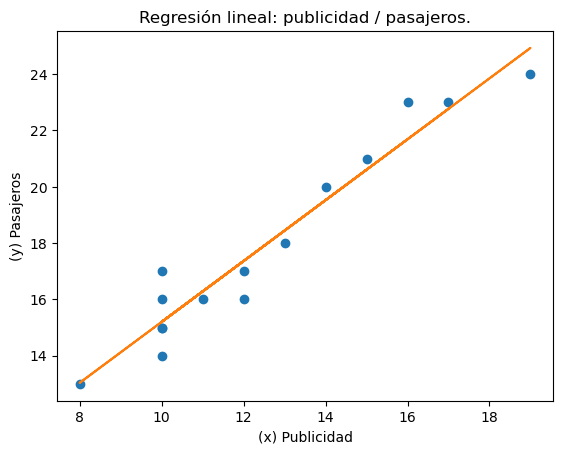

In [7]:
#create basic scatterplot
plt.plot(x, y, 'o') #'o' is for dots; 'ro' is for red dots

#add linear regression line to scatterplot 
plt.title('Regresión lineal: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.plot(x, pendiente*x+interseccion) #y=m*x+b
plt.show() #for clean output

## Paso 5: Estimación.

El 68.3% de las veces que se invierta x valor en publicidad, se espera que el número de pasajeros esté entre: x + 0.91 y x - 0.91

Se estima que por cada 15.0 llamadas realizadas, sean vendidas 20.61 copiadoras según la regresión lineal.
Se estima que por cada 25.0 llamadas realizadas, sean vendidas 31.42 copiadoras según la regresión lineal.
Se estima que por cada 35.0 llamadas realizadas, sean vendidas 42.23 copiadoras según la regresión lineal.
Se estima que por cada 45.0 llamadas realizadas, sean vendidas 53.05 copiadoras según la regresión lineal.
Se estima que por cada 55.0 llamadas realizadas, sean vendidas 63.86 copiadoras según la regresión lineal.


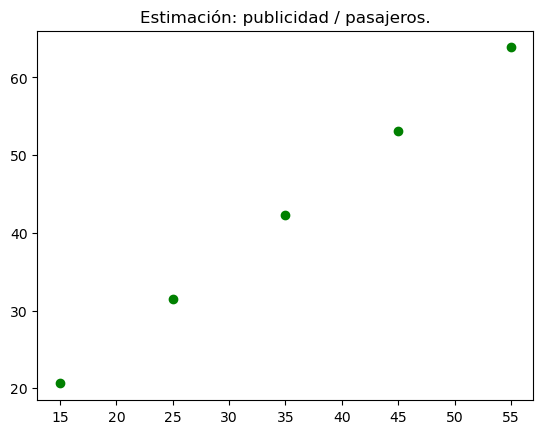

In [9]:
def estimar_valor():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * x_estimado) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada {} llamadas realizadas, sean vendidas {:.2f} copiadoras según la regresión lineal.'.format(x_estimado, y_estimado))

    x = np.array(x)
    y = np.array(y)

    #Gráfico
    plt.title('Estimación: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
    plt.plot(x, y, 'go') #'o' is for dots; 'ro' is for red dots

estimar_valor()